In [10]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
y_2015 = pd.read_csv('./data/2015.csv')
y_2016 = pd.read_csv('./data/2016.csv')
y_2017 = pd.read_csv('./data/2017.csv')
y_2018 = pd.read_csv('./data/2018.csv')
y_2019 = pd.read_csv('./data/2019.csv')

In [5]:
for year, df in zip([2015, 2016, 2017, 2018, 2019], [y_2015, y_2016, y_2017, y_2018, y_2019]):
    print(f"\n=== {year} ===")
    df.info()



=== 2015 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
m

In [34]:
# --- 2015 ---
rename_2015 = {
    "Happiness Score": "Happiness_Score",
    "Happiness Rank": "Happiness_Rank",
    "Economy (GDP per Capita)": "GDP_per_Capita",
    "Health (Life Expectancy)": "Healthy_Life_Expectancy",
    "Trust (Government Corruption)": "Perceptions_of_Corruption",
    "Family": "Social_Support",
}
y_2015 = y_2015.rename(columns=rename_2015)
y_2015["Year"] = 2015


# --- 2016 ---
rename_2016 = {
    "Happiness Score": "Happiness_Score",
    "Happiness Rank": "Happiness_Rank",
    "Economy (GDP per Capita)": "GDP_per_Capita",
    "Health (Life Expectancy)": "Healthy_Life_Expectancy",
    "Trust (Government Corruption)": "Perceptions_of_Corruption",
    "Family": "Social_Support",
}
y_2016 = y_2016.rename(columns=rename_2016)
y_2016["Year"] = 2016


# --- 2017 ---
rename_2017 = {
    "Happiness.Rank": "Happiness_Rank",
    "Happiness.Score": "Happiness_Score",
    "Economy..GDP.per.Capita.": "GDP_per_Capita",
    "Health..Life.Expectancy.": "Healthy_Life_Expectancy",
    "Trust..Government.Corruption.": "Perceptions_of_Corruption",
    "Family": "Social_Support",
    "Whisker.high": "Upper_Confidence_Interval",
    "Whisker.low": "Lower_Confidence_Interval",
    "Dystopia.Residual": "Dystopia_Residual",
}
y_2017 = y_2017.rename(columns=rename_2017)
y_2017["Year"] = 2017
y_2017["Region"] = pd.NA  # no existe en 2017


# --- 2018 ---
rename_2018 = {
    "Overall rank": "Happiness_Rank",
    "Country or region": "Country",
    "Score": "Happiness_Score",
    "GDP per capita": "GDP_per_Capita",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Healthy_Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions_of_Corruption",
}
y_2018 = y_2018.rename(columns=rename_2018)
y_2018["Year"] = 2018
y_2018["Region"] = pd.NA  # no existe en 2018


# --- 2019 ---
rename_2019 = {
    "Overall rank": "Happiness_Rank",
    "Country or region": "Country",
    "Score": "Happiness_Score",
    "GDP per capita": "GDP_per_Capita",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Healthy_Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions_of_Corruption",
}
y_2019 = y_2019.rename(columns=rename_2019)
y_2019["Year"] = 2019
y_2019["Region"] = pd.NA  # no existe en 2019



In [35]:
# Combinar los cinco años (ya renombrados y con columna Year)
data = pd.concat([y_2015, y_2016, y_2017, y_2018, y_2019], ignore_index=True)

**1. Distribution of Happiness Score by Year**

The overall distribution of happiness scores across 2015–2019 is approximately normal, centered around 5–6 points.
The density curves show only minor shifts between years, suggesting that global happiness levels remained relatively stable over this period.

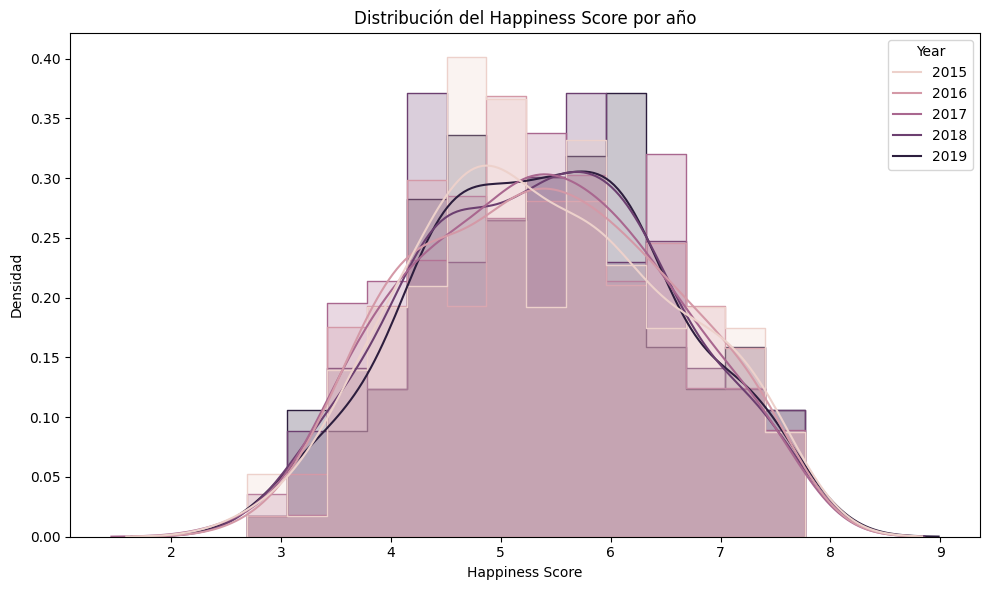

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="Happiness_Score", hue="Year", stat="density", element="step", common_norm=False)
sns.kdeplot(data=data, x="Happiness_Score", hue="Year", common_norm=False)
plt.title("Distribución del Happiness Score por año")
plt.xlabel("Happiness Score"); plt.ylabel("Densidad")
plt.tight_layout(); plt.show()


**2. Boxplot of Happiness Score by Year**

The median happiness score remains steady between 5 and 6 across all years.
The interquartile range (IQR) is narrow, meaning most countries cluster around similar happiness levels, and the range of outliers is consistent—indicating no extreme changes in global happiness variability.

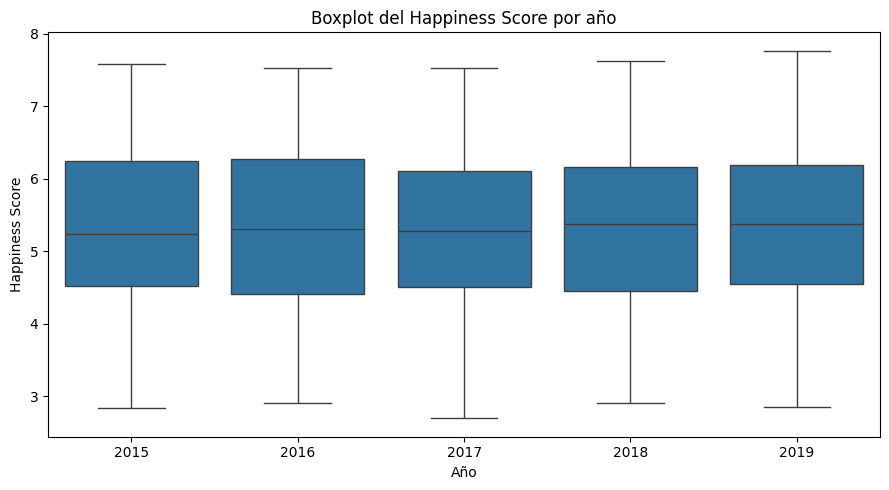

In [37]:
plt.figure(figsize=(9,5))
sns.boxplot(data=data, x="Year", y="Happiness_Score")
plt.title("Boxplot del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.tight_layout(); plt.show()


**3. Violin Plot of Happiness Score by Year**

The violin plots confirm that the distribution shape is consistent from 2015 to 2019, with most density concentrated between scores of 4 and 6.
This reinforces the finding that global happiness distribution has not changed dramatically over time.

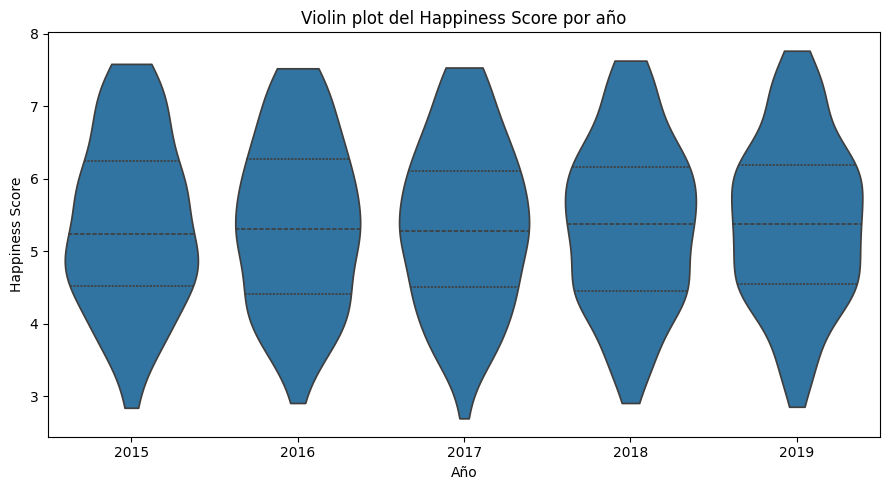

In [38]:
plt.figure(figsize=(9,5))
sns.violinplot(data=data, x="Year", y="Happiness_Score", inner="quartile", cut=0)
plt.title("Violin plot del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.tight_layout(); plt.show()


**4. Top 20 Happiest Countries (Average 2015–2019)**

Northern European countries such as Denmark, Norway, Finland, and Switzerland consistently rank at the top.
These nations typically combine strong social support, high GDP per capita, and high trust in institutions.
Costa Rica stands out as a high performer outside Europe.

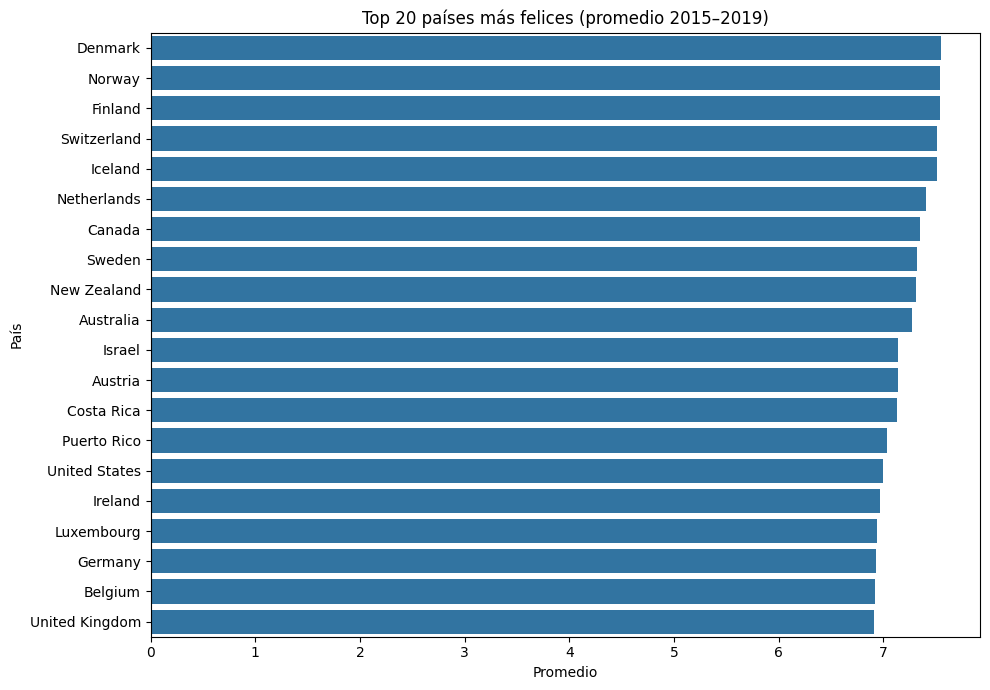

,Country,Happiness_Score
38,Denmark,7.5460
111,Norway,7.5410
46,Finland,7.5378
145,Switzerland,7.5114
61,Iceland,7.5110
103,Netherlands,7.4046
25,Canada,7.3506
144,Sweden,7.3192
104,New Zealand,7.3130
6,Australia,7.2762


In [39]:
by_country = (data.groupby("Country", as_index=False)["Happiness_Score"]
              .mean().sort_values("Happiness_Score", ascending=False).head(20))

plt.figure(figsize=(10,7))
sns.barplot(data=by_country, y="Country", x="Happiness_Score")
plt.title("Top 20 países más felices (promedio 2015–2019)")
plt.xlabel("Promedio"); plt.ylabel("País")
plt.tight_layout(); plt.show()

by_country


**5. Evolution of Happiness Score — Top 10 Countries**

Among the top 10 happiest countries, Finland shows a clear upward trend, becoming the leader by 2019.
Other countries like Norway and Denmark remain consistently high, while Canada and Australia show slight declines.
This highlights the stability of happiness in Nordic nations.

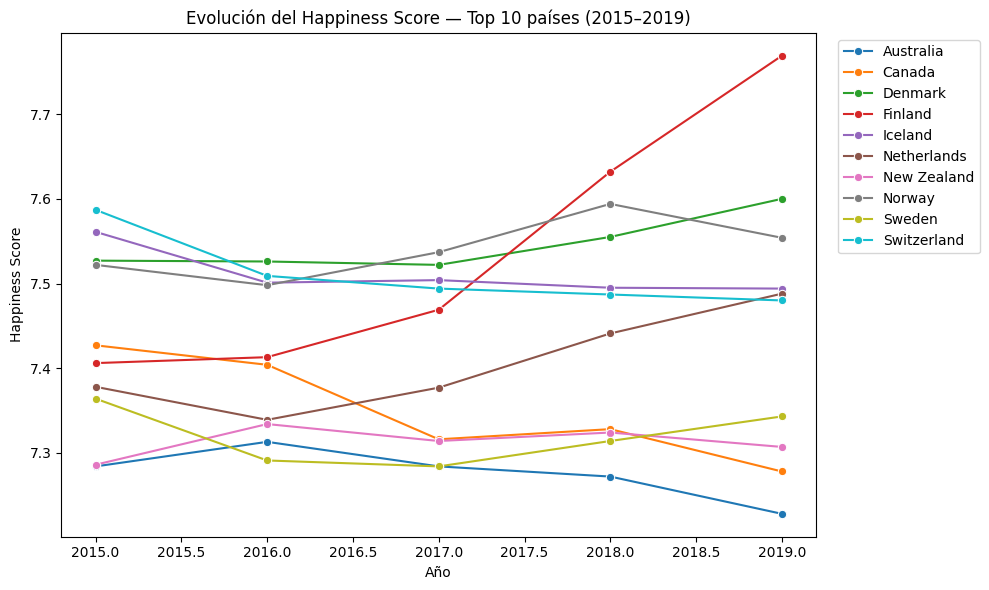

In [40]:
top10 = (data.groupby("Country")["Happiness_Score"]
         .mean().sort_values(ascending=False).head(10).index)

trend_top10 = (data[data["Country"].isin(top10)]
               .groupby(["Year","Country"], as_index=False)["Happiness_Score"].mean())

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_top10, x="Year", y="Happiness_Score", hue="Country", marker="o")
plt.title("Evolución del Happiness Score — Top 10 países (2015–2019)")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left"); plt.tight_layout(); plt.show()


**6. Correlation Matrix (2015–2019)**

Happiness Score is strongly correlated with GDP per Capita (0.79), Healthy Life Expectancy (0.74), and Social Support (0.65).
Freedom and perception of corruption also show moderate positive relationships.
Generosity has the weakest correlation, indicating it contributes less to overall happiness prediction.

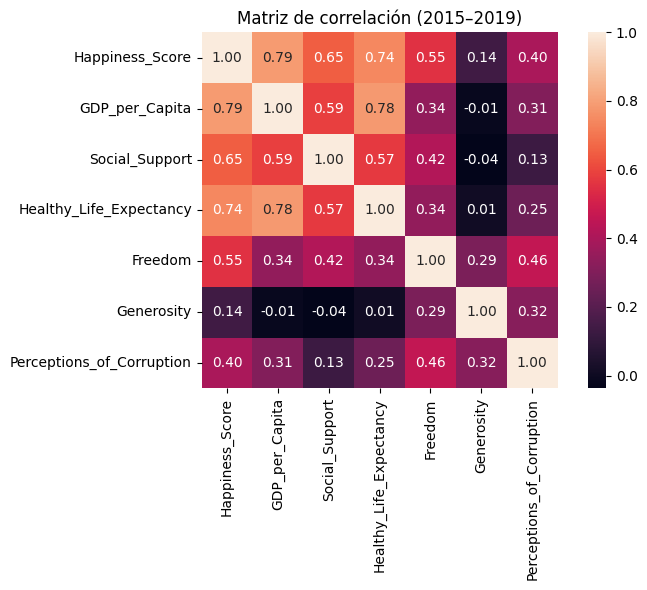

,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
Happiness_Score,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.398418
GDP_per_Capita,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.306307
Social_Support,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.126401
Healthy_Life_Expectancy,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250512
Freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.459593
Generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.318920
Perceptions_of_Corruption,0.398418,0.306307,0.126401,0.250512,0.459593,0.318920,1.000000


In [41]:
num_cols = [
    "Happiness_Score","GDP_per_Capita","Social_Support",
    "Healthy_Life_Expectancy","Freedom","Generosity","Perceptions_of_Corruption"
]
num_cols = [c for c in num_cols if c in data.columns]

corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Matriz de correlación (2015–2019)")
plt.tight_layout(); plt.show()

corr


**7. Global Average Happiness Over Time**

The global average happiness score fluctuates slightly between 5.36 and 5.40, showing overall stability.
Despite local variations, there is no strong upward or downward global trend, suggesting a relatively constant global happiness baseline.

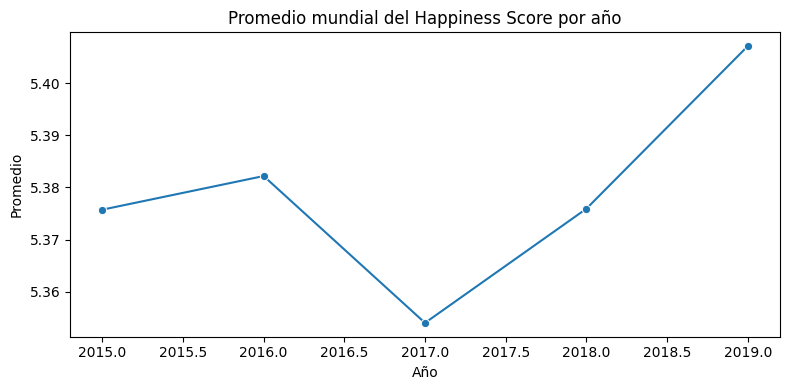

,Year,Happiness_Score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


In [42]:
mean_year = data.groupby("Year", as_index=False)["Happiness_Score"].mean()

plt.figure(figsize=(8,4))
sns.lineplot(data=mean_year, x="Year", y="Happiness_Score", marker="o")
plt.title("Promedio mundial del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Promedio")
plt.tight_layout(); plt.show()

mean_year


**8. Outliers in Happiness Rank by Year**

The boxplot of Happiness Rank shows a symmetric distribution from 1 to about 155 each year, with no strong outliers.
This means the ranking spread among countries remains balanced and similar year to year.

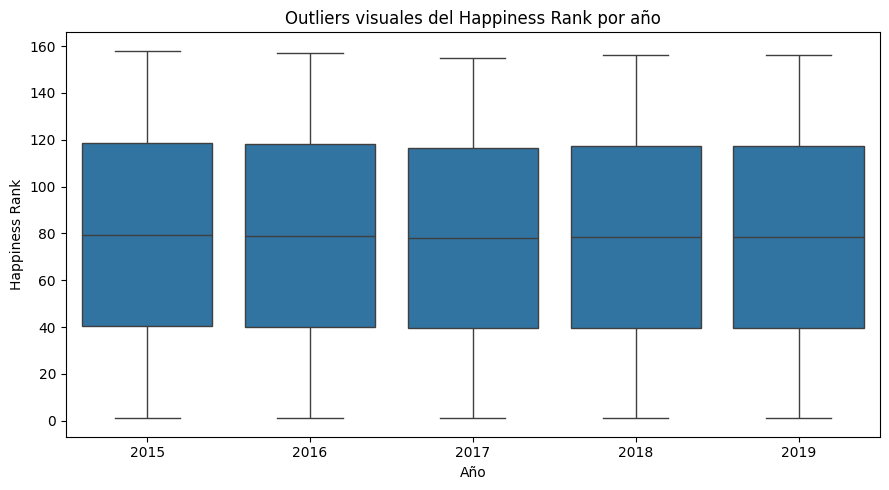

In [45]:
plt.figure(figsize=(9,5))
sns.boxplot(data=data, x="Year", y="Happiness_Rank")
plt.title("Outliers visuales del Happiness Rank por año")
plt.xlabel("Año"); plt.ylabel("Happiness Rank")
plt.tight_layout(); plt.show()


**9. Bottom 10 Least Happy Countries (Average 2015–2019)**

The least happy countries consistently include nations such as Burundi, South Sudan, Central African Republic, and Afghanistan.
These countries tend to face significant economic, political, and social challenges — such as poverty, corruption, low life expectancy, and weak social support networks.
The sharp contrast between the top and bottom 10 countries highlights persistent global inequality in well-being and living conditions.

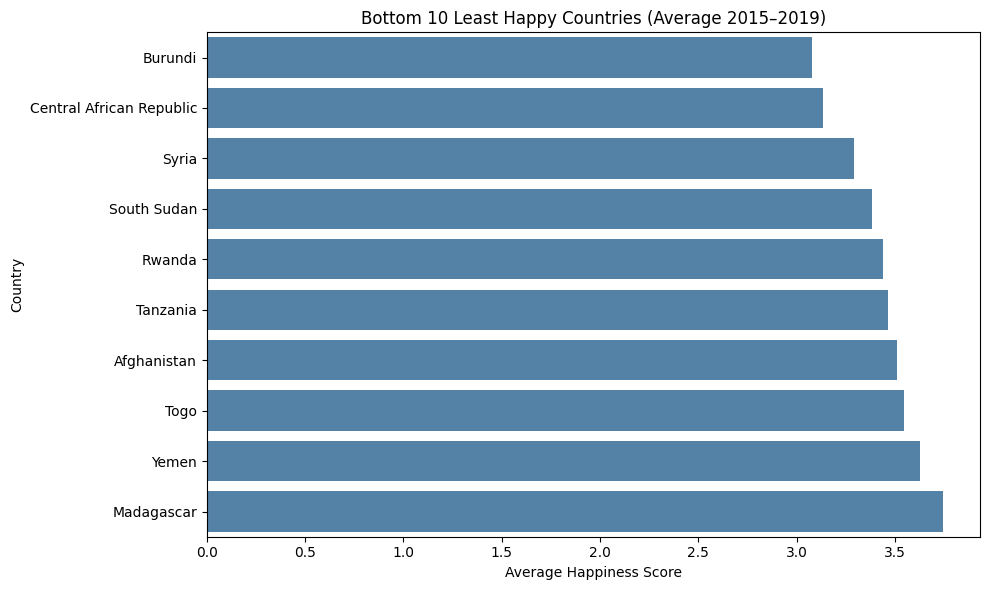

,Country,Happiness_Score
22,Burundi,3.07900
26,Central African Republic,3.13425
146,Syria,3.29220
138,South Sudan,3.38250
125,Rwanda,3.43860
150,Tanzania,3.46600
0,Afghanistan,3.51280
152,Togo,3.54420
167,Yemen,3.62580
87,Madagascar,3.74540


In [46]:
# Bottom 10 least happy countries (average 2015–2019)
bottom10 = (data.groupby("Country", as_index=False)["Happiness_Score"]
            .mean().sort_values("Happiness_Score", ascending=True).head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=bottom10, y="Country", x="Happiness_Score", color="steelblue")
plt.title("Bottom 10 Least Happy Countries (Average 2015–2019)")
plt.xlabel("Average Happiness Score"); plt.ylabel("Country")
plt.tight_layout(); plt.show()

bottom10


**Overall Summary — Happiness EDA (2015–2019)**

The exploratory analysis of global happiness data from 2015 to 2019 shows that average happiness levels remained fairly stable over time, centered around a score of 5–6.
Nordic countries such as Finland, Denmark, and Norway consistently rank highest, supported by strong economies, social trust, and healthy lifestyles.
Conversely, the least happy countries are primarily those affected by conflict or poor governance, where citizens face lower income and weaker health and social systems.
Correlation analysis reveals that GDP per capita, life expectancy, and social support are the most influential drivers of happiness, while generosity and perceptions of corruption play smaller roles.
Overall, happiness across the world demonstrates stability but also enduring inequality — the gap between the most and least happy nations remains wide, reflecting the uneven distribution of social and economic prosperity.